# Predicting sales increase after advertisement campaign using linear regression

In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.figure_factory as ff
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_percentage_error


In [49]:
cd = pd.read_csv('Company_data.csv')

In [50]:
cd.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


### EDA

In [51]:
cd.shape

(200, 4)

In [52]:
cd.info()
cd.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [53]:
fig = px.scatter_matrix(cd)

In [54]:
fig.show()

In [55]:
cd.corr().values

array([[1.        , 0.05480866, 0.05664787, 0.90120791],
       [0.05480866, 1.        , 0.35410375, 0.3496311 ],
       [0.05664787, 0.35410375, 1.        , 0.15796003],
       [0.90120791, 0.3496311 , 0.15796003, 1.        ]])

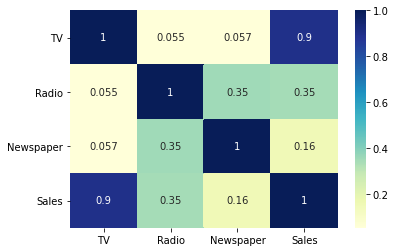

In [56]:
sns.heatmap(cd.corr(), annot = True, cmap = 'YlGnBu');

### Our Liner regression equation is : Sales = mTV + C 

### Building Model

In [57]:
X = cd['TV']

In [58]:
y = cd['Sales']

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 11)

In [60]:
X_train.shape

(160,)

In [61]:
y_train.shape

(160,)

In [62]:
 reg = LinearRegression()

In [63]:
X_shape = X_train.values.reshape(-1, 1)

In [64]:
y_shape = y_train.values.reshape(-1, 1)

In [65]:
X_shp_test = X_test.values.reshape(-1, 1)

In [66]:
Y_shp_test = X_test.values.reshape(-1, 1)

In [67]:
reg.fit(X_shape, y_train.values)

LinearRegression()

In [68]:
print (reg.intercept_)

7.1129005446738365


In [69]:
print (reg.coef_)

[0.05410404]


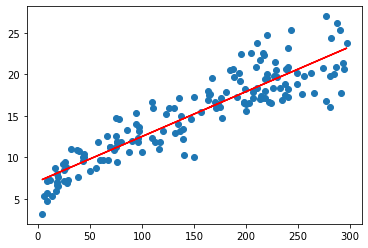

In [88]:
plt.scatter(X_train, y_train)
plt.plot(X_train, 7.1129005446738365 + 0.05410404*X_train, 'r');

In [73]:
y_train_pred = reg.predict(X_shape)

In [74]:
y_test_pred = reg.predict(X_shp_test)

In [77]:
print(r2_score(y_train, y_train_pred))

0.8197903058557778


In [78]:
print(r2_score(y_test, y_test_pred))

0.7845813893794688


In [79]:
(0.82 - 0.784)/ 0.82

0.04390243902439015

In [81]:
mean_absolute_percentage_error(y_test , y_test_pred)

0.23891218985730958

In [84]:
accuracy = (1 - mean_absolute_percentage_error(y_test , y_test_pred))

In [85]:
print(accuracy)

0.7610878101426904
